**Exercise 2**

For this exercise, please submit a screenshot of your code for creating a map of your data at any stage. The deadline is a few days before your second project's due date, so by then, you should have a clean draft. However, this is to get you started on finishing this challenging task. This exercise will be marked for submission and not content; however, the quality of your submission will be a good predictor of your second project's mark. 


1. In your project datasets, you should know the geographic level that you are working with. Is is Zip code? Is it county? Is it state? Is it country? Check the column that contains this information. Is it nice and clean? What is the format? Are there any missings? 

2. Go to the "useful links" column on the spreadsheet where you chose your preferred dataset. I have added the spreadsheet to this Module for your convenience as well. Check the column titled "useful links." Check the sample code and see if there is code for a map. You can also go to the original data link, click on the "Notebooks" tab and find hundreds of example notebooks on your dataset! When you click on the "Data link" column of the excel file, you are directed to a Kaggle page. There click on the "Notebooks" tab. You can then search for keywords to find the sample code that you want. Make sure the sample notbook is in Python and not in R.

3. Familiarize yourself with the U.S. Census Shapefiles. Look at the Wisconsin voting example above (in this notebook). I have provided the Census Shapefile links in the spreadsheet in the 4th and 10th row. You can use these links as in the Wisconsin example and make your plots. 

4. If you do not want to plot all of your observations as dots on the map, you should create a new data frame with the unique location names. All of your datasets are in panel format, which means that you have more than one row for each location. Therefore you need to first create a dataset with the unique values for each geographic level (whatever value you want to plot) and the unique names or IDs for the goegraphic levels (zip codes, cities, etc.), put it in a data frame, and then map it. For example, if you have created an average measure of SAT grades for each zip code. You want a data frame with these columns: (zipcode, average SAT for each zip). You can then merge this with your zip code shapefile (like we merged county with poll results in the example above) and plot. 

5. There will be more complications. For instance, the name of the city or county, or state may have extra strings, may be in lower case or upper case, and therefore your merge with the shapefile can fail. Always check the values in both your dataset (containing the original lat/long) and your shapefile. Leave 3-4 days for errors and for figuring out the sample code.

6. Make sure to take advantage of the existing notebooks on Kaggle. Feel free to read, understand, and use their code. Look for a map and try to understand the code first and then apply it to your notebook. This is not cheating; it's how you learn to code. Simplying copy pasting someone's code is cheating.

7. You do NOT need to use the same libraries as we used here necessarily. What I showed you was a popular library but there are many more. Get creative and explore. You can also look at other suggested notebooks for other datasets in the Excel spreadsheet to get inspired.


**Note that creating your first map with a real-world data can take days or weeks. Start ASAP and get your questions answered. Producing a map of your data is one part in your second project.**


Enjoy being a creator!

In [3]:
# Read dataset
ny2019_airbnb_raw = pd.read_csv("AB_NYC_2019.csv")
# Get a copy of the original dataset
ny2019_airbnb_raw_copy = ny2019_airbnb_raw.copy()

# Change the datatype of last review from object to datetime
ny2019_airbnb_raw_copy['last_review'] =  pd.to_datetime(ny2019_airbnb_raw_copy['last_review'])

# Drop the variables which we are not going to use
ny2019_airbnb_clean =  ny2019_airbnb_raw_copy.drop(
    ['id', 'name', 'host_id', 'host_name', 'reviews_per_month'], axis = 1)

## Part 1

In [4]:
# Get summarative information of data to examine missing values
ny2019_airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  object        
 1   neighbourhood                   48895 non-null  object        
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  object        
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     38843 non-null  datetime64[ns]
 9   calculated_host_listings_count  48895 non-null  int64         
 10  availability_365                48895 non-null  int64         
dtypes:

In [5]:
# Display some data to get a sense about data
ny2019_airbnb_clean.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,1,0


Based on the above glimpse of data, we can understand that the geographical level we are working with is the New York City. We have neighbourhood groups which we can view as districts of the New York City, and we have neighbourhoods which we can view as sub-districts of districts. These columns are categorical variables and they are pretty clean in the way that there is no missing data for any of these columns. We also have access to the absolute latitude and longitude data in 5 decimal places, which is very detailed. This enables us to plot the map of New York City while maintaining enough precision to distinguish each data point. Luckily, we do not observe any missing values for latitude and longitude columns either. Overall, the geographical aspect of data is pretty nice and clean.

In [6]:
# Make the geodataframe
ny2019_airbnb_clean["Coordinates"] = list(zip(ny2019_airbnb_clean.longitude, ny2019_airbnb_clean.latitude))
ny2019_airbnb_clean["Coordinates"] = ny2019_airbnb_clean["Coordinates"].apply(Point)
ny2019_airbnb_gdf = gpd.GeoDataFrame(ny2019_airbnb_clean, geometry="Coordinates")
ny2019_airbnb_gdf.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,Coordinates
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,6,365,POINT (-73.97237 40.64749)
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2,355,POINT (-73.98377 40.75362)
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,1,365,POINT (-73.94190 40.80902)
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,1,194,POINT (-73.95976 40.68514)
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,1,0,POINT (-73.94399 40.79851)


## Part 2

I checked the 'useful links' column on the given spreadsheet yet I did not find any code for creating maps. However, I did find some sample codes in python from Kaggle uploaded by other users who had worked on the same dataset. I will definitely make some references to these sample codes for my own research.

## Part 3

I tried loading several US census shapefiles and it turned out that I cannot get a boundary dataset for New York City only. The closest I can get was the combination of New York City and some other cities (Newark and Jersey City), which I would not include in the map. The followings codes are my attempt.

In [7]:
# Read US shapefiles
US_city_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_cbsa_500k.zip")
US_city_df.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,38420,310M300US38420,38420,"Platteville, WI",M2,2970368437,94555361,"POLYGON ((-91.15681 42.98817, -91.15302 42.990..."
1,None,15060,310M300US15060,15060,"Brookings, OR",M2,4217640656,934462436,"MULTIPOLYGON (((-124.32389 42.06665, -124.3232..."
2,446,39420,310M300US39420,39420,"Pullman, WA",M2,5592428647,48281266,"POLYGON ((-118.24912 46.73414, -118.24550 46.7..."
3,None,33540,310M300US33540,33540,"Missoula, MT",M1,6715977352,64471601,"POLYGON ((-114.79720 47.26892, -114.79543 47.2..."
4,None,21540,310M300US21540,21540,"Escanaba, MI",M2,3033119057,2124391646,"MULTIPOLYGON (((-86.65922 45.73790, -86.65819 ..."


In [8]:
# Filter the shapefile data by New York City
NYC_df = US_city_df[US_city_df['NAME'].str.contains('New York')] 

In [9]:
NYC_df

,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
196,408,35620,310M300US35620,35620,"New York-Newark-Jersey City, NY-NJ-PA",M1,21482849462,6685318568,"MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ..."


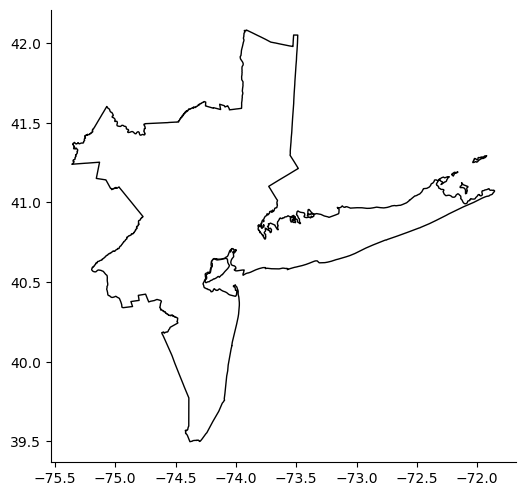

In [10]:
fig, gax = plt.subplots(figsize=(6, 8))
NYC_df.plot(ax=gax, edgecolor="black", color="white")
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

The above plot contains regions that are not part of the New York City. Therefore, I am considering using shapefiles outside from the US census database.

In [11]:
# Now read data from another source: NYC database
NYC_df = gpd.read_file('ZIP_CODE_040114.zip')

In [12]:
# Take a brief look at the data
NYC_df.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


We can notice from the geometry column that the geographic locations are not in the unit of latitude and longitude. We have to convert them to latitude and longitude in order to plot data points.

In [13]:
NYC_df = NYC_df.to_crs(epsg='4326') # Convert the crs to latitude and longitude

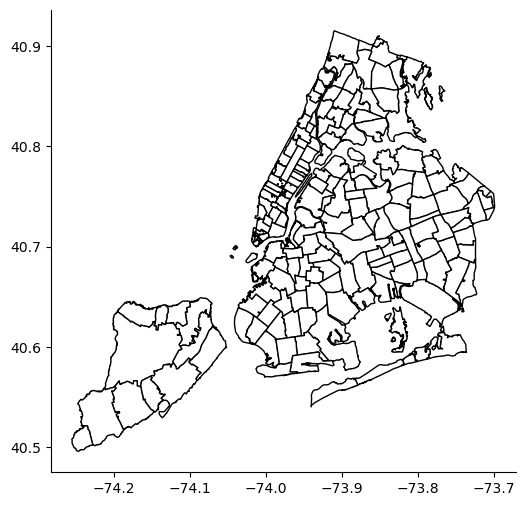

In [14]:
# Plot the NYC map, which looks good for now!
fig, gax = plt.subplots(figsize=(6, 8))
NYC_df.plot(ax=gax, edgecolor="black", color="white")
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

## Part 4 and 5

Here we will first plot all points to see how it looks on our map.

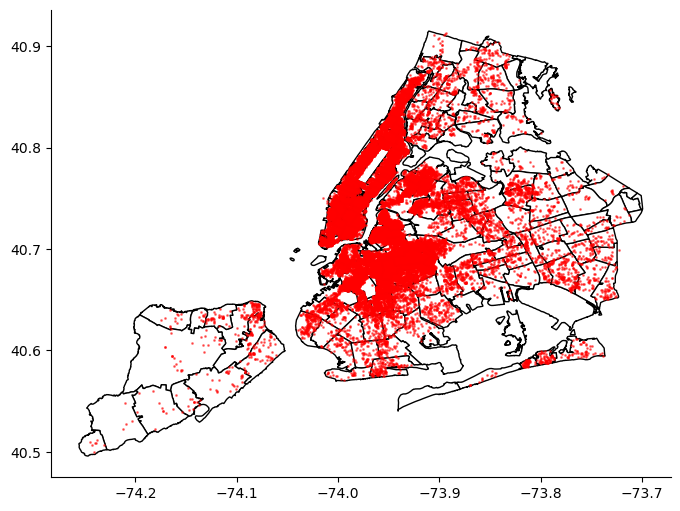

In [15]:
# Plot the map with data points
fig, gax = plt.subplots(figsize=(8, 8))
NYC_df.plot(ax=gax, edgecolor="black", color="white")
ny2019_airbnb_gdf.plot(ax=gax, color='red', alpha = 0.5, markersize = 1)
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

Indeed, this map does not look so good. It certainly does tell us how Airbub houses in the dataset are spread geographically, but it would be more helpful if we can categorize them into neighborhoods. But before that, let us first determine whether we should include all of these points on the map, and if there is possibility to limit the number of points.

In [16]:
# Check the number of unique values for coordinates
len(ny2019_airbnb_gdf['Coordinates'].unique())

48871

As computed, we have 48871 distinct coordinates in our dataset, so reducing the number of points by taking unique values would not be so helpful. Reducing the number of points to map would also be tricky since we do not know how to select representative points. Therefore, we would proceed by keeping all of these points, but adding different colors for each neighborhood group so that we can at least identify which neighborhood has more Airbnb houses.

In [17]:
ny2019_airbnb_gdf['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [18]:
# Split the geodataframe by neighbourhood
Brooklyn_gdf = ny2019_airbnb_gdf[ny2019_airbnb_gdf['neighbourhood_group'] == 'Brooklyn']
Manhattan_gdf = ny2019_airbnb_gdf[ny2019_airbnb_gdf['neighbourhood_group'] == 'Manhattan']
Queens_gdf = ny2019_airbnb_gdf[ny2019_airbnb_gdf['neighbourhood_group'] == 'Queens']
StatenIsland_gdf = ny2019_airbnb_gdf[ny2019_airbnb_gdf['neighbourhood_group'] == 'Staten Island']
Bronx_gdf = ny2019_airbnb_gdf[ny2019_airbnb_gdf['neighbourhood_group'] == 'Bronx']

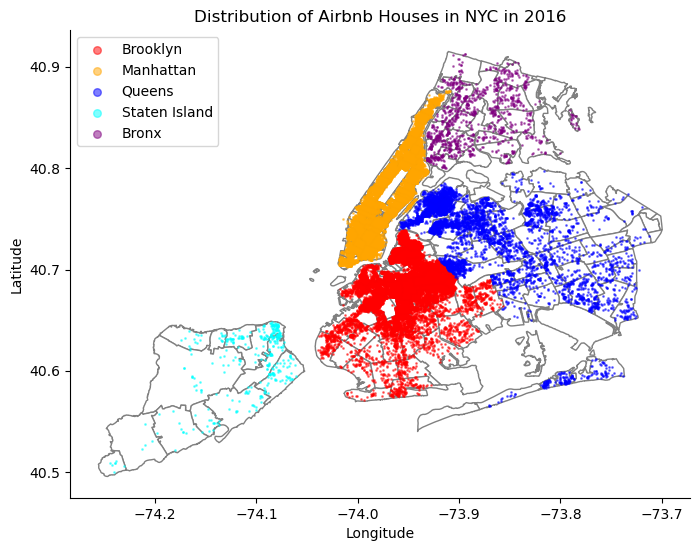

In [19]:
# Plot the map with data points, and give different colors for each neighbourhood
fig, gax = plt.subplots(figsize=(8, 8))

NYC_df.plot(ax=gax, edgecolor="grey", color="white")
Brooklyn_gdf.plot(ax=gax, color='red', alpha = 0.5, markersize = 1)
Manhattan_gdf.plot(ax=gax, color='orange', alpha = 0.5, markersize = 1)
Queens_gdf.plot(ax=gax, color='blue', alpha = 0.5, markersize = 1)
StatenIsland_gdf.plot(ax=gax, color='cyan', alpha = 0.5, markersize = 1)
Bronx_gdf.plot(ax=gax, color='purple', alpha = 0.5, markersize = 1)

# Also, add a legend that gives names of neighbourhoods
legend = plt.legend(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'], 
                    loc = 'upper left')

# Specify point sizes in legend using a for-loop
for i in range(len(legend.legendHandles)):
    legend.legendHandles[i]._sizes = [30]

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Distribution of Airbnb Houses in NYC in 2016')

plt.show()

Now our map looks fairly informative, as we can directly tell that Manattan and Brooklyn are neighbourhoods that offer the largest number of Airbnb houses compared with other neighbourhoods. Such concentration of houses may indicate the popularity of neighbourhoods, which may affect the housing price (the main variable we would like to study).

## Part 6 and 7

I have looked at some sample codes given from Kaggle, which was uploaded by other users working on the same dataset. The below will be my replication work exploring possibilities of other kinds of map.

It turns out that I can use color saturation to display the distribution of certain variables geographically. Here we would use the response variable price as an example. Since price is very spread out, we would focus on the part of distribution where most observations fall into, which means we will eventually draw a separate map for outliers in order to aviod our map suffering from poor discriminability.

In [20]:
# Identify numerical distribution of price
ny2019_airbnb_gdf['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

We can set our threshold for outliers at above 200 for now.

In [21]:
# Filter data to remove outliers
ny2019_airbnb_gdf_commons = ny2019_airbnb_gdf[ny2019_airbnb_gdf['price'] <= 200]
ny2019_airbnb_gdf_outliers = ny2019_airbnb_gdf[ny2019_airbnb_gdf['price'] > 200]

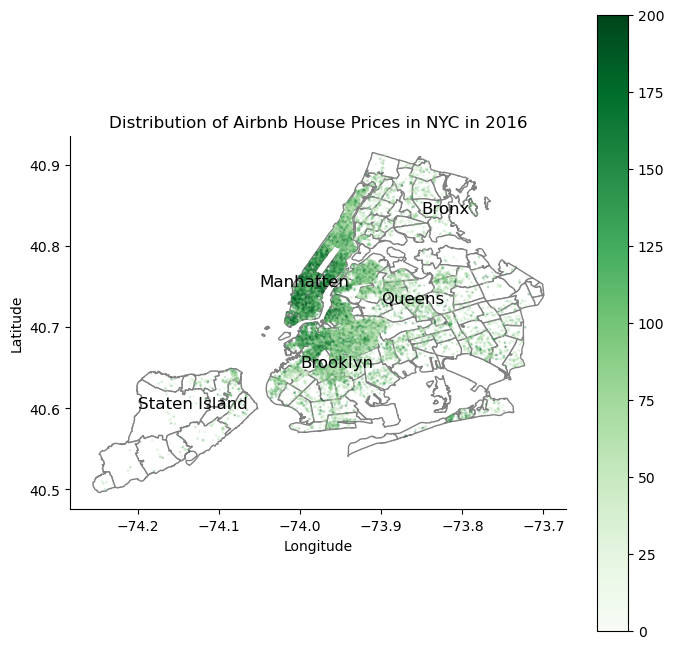

In [33]:
fig, gax = plt.subplots(figsize=(8, 8))

NYC_df.plot(ax=gax, edgecolor="grey", color="white")
# Plot the data points by their price as color saturation
ny2019_airbnb_gdf_commons.plot(ax=gax, column = 'price', cmap='Greens', 
                       alpha=0.2, markersize = 1, legend=True)

# Add annotation of neighbourhoods
gax.annotate('Manhatten', xy=(-74.05, 40.75), size = 12)
gax.annotate('Bronx', xy=(-73.85, 40.84), size = 12)
gax.annotate('Queens', xy=(-73.9, 40.73), size = 12)
gax.annotate('Brooklyn', xy=(-74, 40.65), size = 12)
gax.annotate('Staten Island', xy=(-74.2, 40.6), size = 12)

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Distribution of Airbnb House Prices in NYC in 2016')

# add colorbar
#ax_cbar = fig.colorbar(cbar, ax=gax, vmin = 0, vmax = 10000)

plt.show()

Now our map is pretty informative, as we can recognize that Manhatten is the neighborhood that has the highest concentration of expensive houses, indicating that it is a popular neighborhood. The map also gives a great visualization on how geographically the data is spread, which gives valuable insights.